In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

In [29]:
data = pd.read_csv('577889.out', skiprows=2308, header=None)
data2 = pd.read_csv('587907.out', skiprows=2307, header=None)

data = pd.concat([data, data2])

In [74]:
import re

re_ppl = re.compile('\| ppl ([\d.]+) \|')
re_upd = re.compile('\| num_updates ([\d.]+) \|')

def get_valid_loss(filename):
    with open(filename) as f:
        for line in filter(lambda x: "valid on 'valid' subset" in x, f):
            ppl = float(re_ppl.findall(line)[0])
            try:
                upd = int(re_upd.findall(line)[0])
            except IndexError:
                upd = None
            yield {'updates': upd, 'ppl': ppl}
            
            
valid_loss = pd.concat([pd.DataFrame(get_valid_loss('577889.out')), pd.DataFrame(get_valid_loss('587907.out'))])

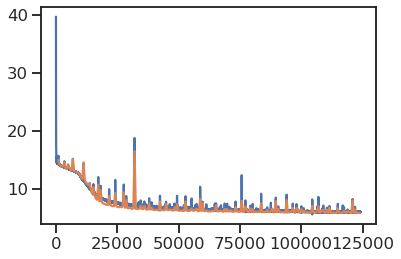

In [79]:
data = data[data[1].str.contains('ppl') == True]

ppl = data[1].str.extract('ppl=([\d.]+)$').astype(float)
step = data[6].str.extract('num_updates=([\d.]+)$').astype(int)

plt.plot(step, ppl)
plt.plot(valid_loss.updates, valid_loss.ppl)

(5.0, 10.0)

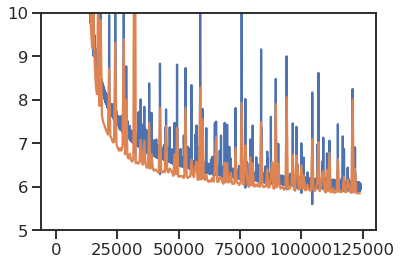

In [80]:
plt.plot(step, ppl)
plt.plot(valid_loss.updates, valid_loss.ppl)
plt.ylim([5, 10])